# Session 3 Exercises

These are the exercises from the Session 3 notes

In [2]:
# We always start with appropriate imports; note the use of the IPython magic
# command to set up Matplotlib within the notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 3. Grids

### In-class

1. Use `np.logspace` to create an array `x` with twenty elements that run from $10^{-3}$ to 1 (check the syntax with the interactive help). Create an array `y` of twenty zeros (or ones if you prefer) and plot `y` vs `x` with points (the point here is to see how the grid works). Use `fig = plt.figure` and `ax = fig.add_subplot(1,2,1)` to create a $1\times 2$ array of subplots (you will fill in the other plot in the next question). NB You will need to use `%matplotlib notebook` at the start of your notebook to be able to update a figure between different cells.

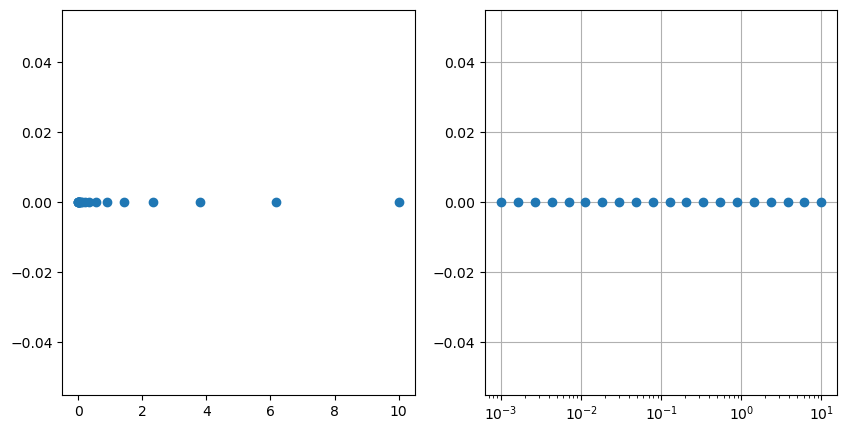

In [4]:
x = np.logspace(-3, 1, 20)
y = np.zeros(20)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x, y, 'o')

ax2 = fig.add_subplot(1, 2, 2)
ax2.semilogx(x, y, 'o')
ax2.grid()


2.	Now add a plot to your figure (remember that the final argument to `ax2 = fig.add_subplot` should now be 2, for the second subplot) of the same arrays using `ax2.semilogx`. I found `ax2.grid` helpful here (on both axes) to visualise what is happening. How do the two plots compare in terms of clarity?

3. The Archimedes spiral is defined in polar coordinates as $r=a+b\theta$. Create a new figure using `fig = plt.figure(figsize=(9,3))` (though you may change the figure size to suit your preference) and add a polar subplot using `ax = fig.add_subplot(1,2,1,polar=True)`. Make a polar plot for $0\le \theta \le 6\pi$, calculating $r$ from the definition above, using `ax.plot(theta,r)` (note that the arguments are not the standard way around!) . Experiment with values of $a$ and $b$.

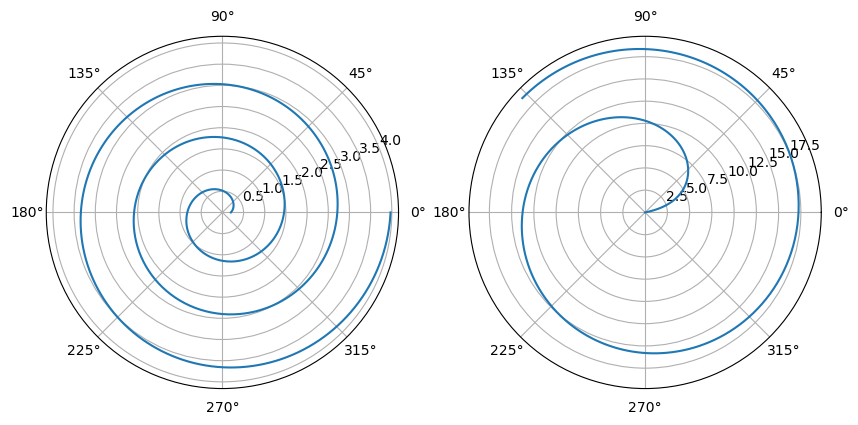

In [8]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,2,1,polar=True)

theta = np.linspace(0, 6*np.pi, 1000)
a = 0.2
b = 0.2

ax.plot(theta, a + b*theta)
ax2 = fig.add_subplot(1,2,2,polar=True)
ax2.plot(a*np.exp(b*theta), theta)

4. The logarithmic spiral is defined rather differently: $r=a \exp(b\theta)$, where $a$ and $b$ are different variables to those in the Archimedes spiral. Add a polar plot for this spiral to your figure.

### Further work

1. With the array that you created in Q1 (in the in-class exercises above), make plots of $1/x$ on linear axes (`plt.plot`), semi-log axes (`plt.semilogx`) and log-log axes (`plt.loglog`). Think carefully about the advantages and disadvantages of each of these approaches.

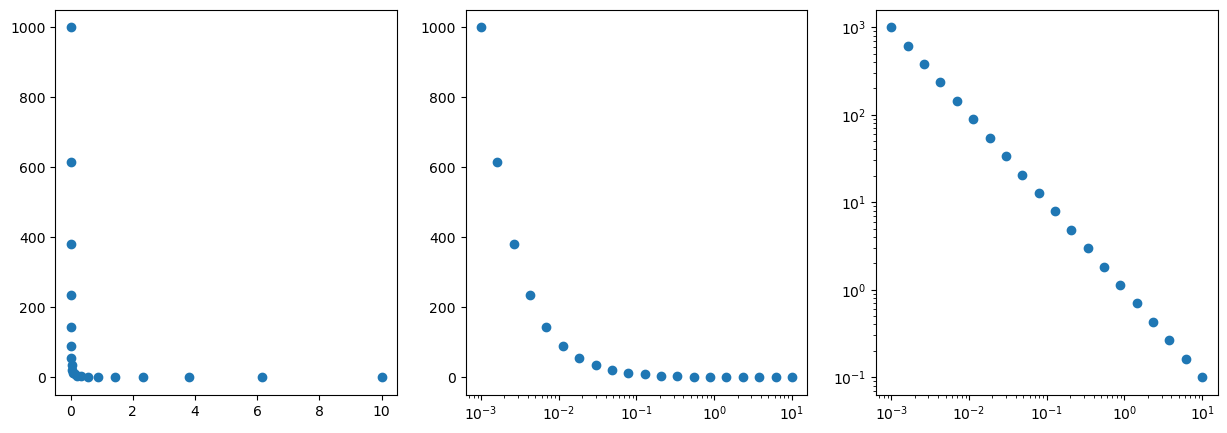

In [9]:
y = 1/x

fig2 = plt.figure(figsize=(15,5))
ax3 = fig2.add_subplot(1, 3, 1)
ax3.plot(x, y, 'o')

ax4 = fig2.add_subplot(1, 3, 2)
ax4.semilogx(x, y, 'o')

ax5 = fig2.add_subplot(1, 3, 3)
ax5.loglog(x, y, 'o')

2. Make Cartesian plots for the Archimedes and logarithmic spirals, calculating $x$ and $y$ explicitly from $r$ and $\theta$. Experiment with using points rather than lines for the plot: would a logarithmic grid or some other grid make more sense for the logarithmic spiral with points?

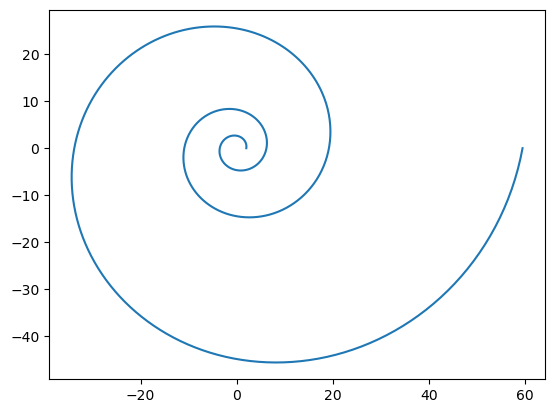

In [12]:
a_log = 2
b_log = 0.18
r_log = a_log * np.exp(b_log * theta)
x_log = r_log * np.cos(theta)
y_log = r_log * np.sin(theta)

plt.plot(x_log, y_log)

3. (*More challenging; do not worry if you cannot complete this*) We can create a non-orthogonal grid by defining vectors $\mathbf{a}=(1,0)$ and $\mathbf{b}=(0.5,√3/2)$ and a mesh whose points are found at $i\mathbf{a}+j\mathbf{b}$ for $i$ and $j$ integers. Create one array `pos` (dimensions `[2,N,N]` where N is the grid size) to store the $x$ and $y$ components of the grid positions and calculate them (it’s easiest to loop over $i$ and $j$ and use the expression above).  You might like to plot the points of the grid (use dots) to help visualize it, using something like `plt.plot(pos[0],pos[1],’bo’)`.  Create a 2D function such as $\cos(x)\times \sin(y)$ (remember that you can use `pos[0]` to access the entire 2D array of x values) and plot it using `plt.contourf(x,y,surface)`.

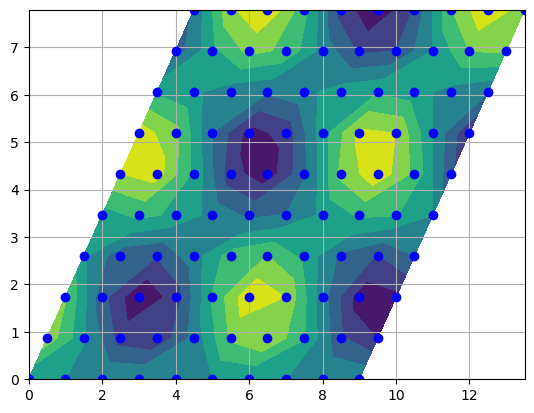

In [24]:
N = 10

a = np.array((1, 0))
b = np.array((0.5, 0.5*np.sqrt(3)))
pos = np.zeros((2, N, N))

for i in range(N):
    for j in range(N):
        pos[:,i,j] = i*a + j*b
        # all elements of N, then takes the ith row and the jth column

s = np.cos(pos[0]) * np.sin(pos[1])
plt.contourf(pos[0], pos[1], s)
plt.plot(pos[0], pos[1], 'bo')
plt.grid()

## 4. Differentiation

### In-class

1. Create a function that implements the forward difference formula, taking the function $f(x)$, $x$ and $\Delta x$ as inputs and returns the approximation to the differential (in this case do not use `np.roll`: here we use a function and a specified value x though of course it could be an array).

In [28]:
def f_diff(f, x, delta):
    return (f(x + delta) - f(x))/delta

2. Test it on the sine function for one specific value of $x$ (I chose $x=1.0$; any value except a special pint such as $x=0$ or $x=\pi$ will do), using `np.cos` to check the result. Plot the difference between the approximation and the analytic differential for different values of $\Delta x$. Try using `np.logspace` to set up an array of values for $\Delta x$, and see if `plt.loglog` is useful. (Note: if you take $\Delta x$ below about $10^{-5}$ then you will see interesting behaviour.)

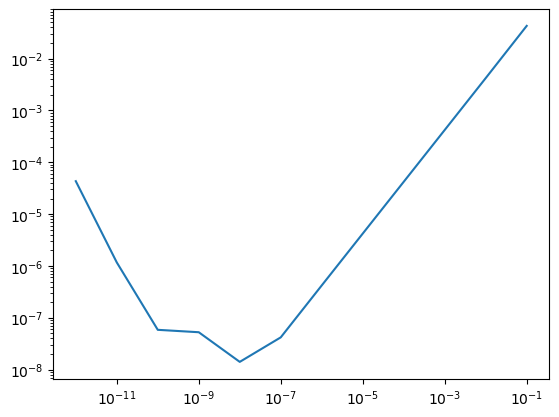

In [32]:
x = 1
N = 12

dx_arr = np.logspace(-N, -1, N)
results = np.zeros(N)

for i, dx in enumerate(dx_arr):
    results[i] = abs(f_diff(np.sin, x, dx) - np.cos(x))

plt.loglog(dx_arr, results)

3. Create an array of $x$ values from $0\rightarrow 2\pi - \Delta x$ with spacing $\Delta x=2\pi/500$. Create an array holding $cos(x)$ using `np.cos`. Now calculate the forward finite difference approximation to the differential of the array using `np.roll`, and compare to the exact result found using `np.sin`. (The shift in `np.roll` equivalent to $+\Delta x$ is an index of -1. Make sure that you understand why. Also think about why we chose the value of $\Delta x$.)

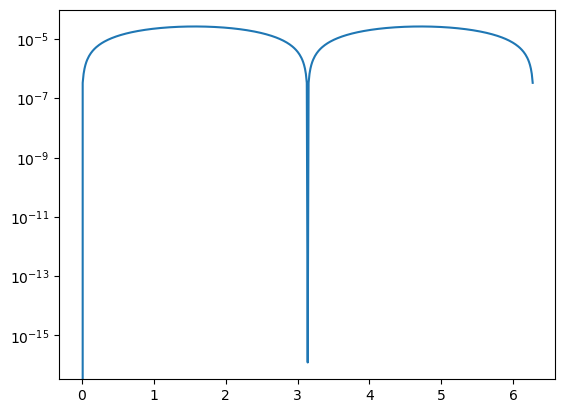

In [34]:
dx = 2*np.pi/500
x_roll = np.arange(0, 2*np.pi, dx)
y_roll = np.cos(x)

cos_roll = np.cos(x_roll)
sin_roll = np.sin(x_roll)

fdc_roll = (np.roll(cos_roll, -1) - np.roll(cos_roll, 1))/(2*dx)

plt.semilogy(x_roll, abs(fdc_roll+sin_roll))


### Further work

1.	Implement a function for the *centred* difference and do the same analysis you did for the forward difference in the in-class exercises. Does this behave as expected? Check that the errors in the formulae for differentials follow our analysis above (linear for forward, quadratic for centred). 

In [35]:
def centredFD(fun,x,dx):
    df = fun(x + dx) - fun(x - dx)
    return df/(2*dx)

## 

2.	Write a function to calculate the second derivative using the centred formula. As in the previous question, test it for sine, comparing to what you know the analytic result to be.

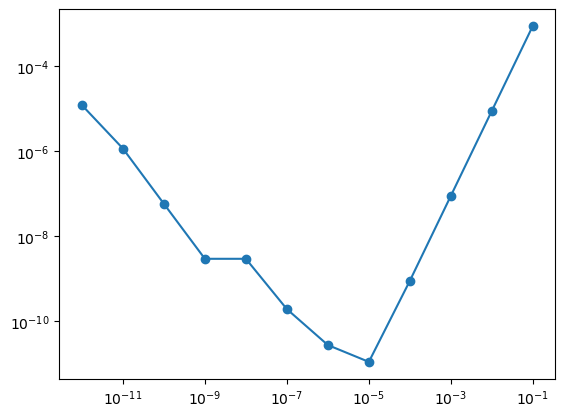

In [37]:
x = 1.0
N = 12

dx_array = np.logspace(-N, -1, N)
results = np.zeros(N)

for i, dx in enumerate(dx_array):
    results[i] = abs(centredFD(np.sin, x, dx) - np.cos(x))

plt.loglog(dx_array, results, 'o-')

3.	Write a function that combines two first derivative FD functions and compare the results to the centred second derivative you did in class (you may wish to experiment with two forward differences vs forward and back).

In [38]:
# I wrote the second derivative function in another exercise

## 5. Integration

### In-class

1.	Create a simple integration function that uses the rectangle formula. It will need to take a function, two limits and a number of points (or spacing) as arguments. You could use this interface:

In [40]:
def rectangle_int(f,a,b,N):
    """docstring: f is a Python function to be integrated"""
    dx = (b-a)/N
    
    sum = 0
    for i in range(1, N):

        sum += f(a+i*dx) * dx

        
    return sum

2. Use this function to calculate the definite integral of a simple function (choose something that you can solve analytically in the first instance, like $2x$ which will integrate to $x^2$) and investigate the effect of the spacing (width).

In [41]:
def f(x):
    return 2*x

print(rectangle_int(f, 0, 1, 1000))

0.9990000000000003


3. Now calculate the integral of $x\cos(x)$ from 0 to 1.

In [42]:
def f(x):
    return x*np.cos(x)

print(rectangle_int(f, 0, 1, 1000))

0.3815030310923759


4.	Implement the trapezium rule (copy and adapt your rectangular integration function if you like) and do the same calculation (be careful about the beginning and end points). You should be able to find the exact answer using integration by parts.

In [43]:
def trapezium_int(f,a,b,N):
    """docstring: f is a Python function to be integrated"""
    dx = (b-a)/N
    
    sum = f(a)/2 + f(b)/2
    for i in range(1, N):

        sum += f(a+i*dx)

        
    return sum * dx

trapezium_int(f, 0, 1, 1000)

0.38177318224531015

### Further work

1. Implement Simpson’s rule, and integrate $x \cos(x)$ from 0 to 1. By looking at the formulae, consider which is the best approximation in terms of accuracy vs effort.

In [44]:
def simpson_int(f,a,b,N):
    dx = (b-a)/N
    sum = f(a) + f(b)

    for i in range(1, N, 2):
        sum += 4*f(a+i*dx)

    for j in range(2, N-1, 2):
        sum += 2*f(a+j*dx)

    return sum * dx / 3

simpson_int(f, 0, 1, 1000000)

0.3817732906760189

2. Write a Python function to integrate a two-dimensional function, $f(x,y)$, using the simple 2D extension of the rectangle rule above: you should sum over the values of the function on a 2D grid (note that `np.sum(a)` will return the sum over all the entries in the array `a`, even if 2D) and scale by the area between grid points. Your function definition should look like this:

In [47]:
def integrate_2d(fun,x,y,dx,dy):
    return dx*dy*np.sum(fun(x,y))

Now test this. Define the function f(x,y)=cos(x)cos(y) and integrate between 0 and π/4 for both x and y (you should be able to work out the analytic result quite easily). Explore the effect of the grid spacing on the accuracy and the time taken. Be sure to include the end point in the integration.

In [50]:
def f(x,y):
    return np.cos(x) * np.cos(y)

N = 1001
mval = np.pi/4
x = np.linspace(0, mval, N)
y = np.linspace(0, mval, N)
delta = mval/(N-1)

x2D, y2D = np.meshgrid(x,y)

print("integral of cos(x)cos(y) between 0 and pi/4 is {}".format(integrate_2d(f, x2D, y2D, delta, delta)))

integral of cos(x)cos(y) between 0 and pi/4 is 0.500948457404405


## 5.2 Library routines

### In-class exercises

1.	Calculate the same integrals using SciPy’s routines (`integrate.trapz` and `integrate.simps`) as you did in the previous section (remember to import the appropriate module). Compare the answers.

### Further work

1. Use the library routine `quad` from `scipy.integrate` and see how accurate it is. Try adding an argument to your $x\cos(x)$ function (to change to $x\cos(\alpha x)$,say), and passing it to quad.

In [56]:
from scipy import integrate

def xcosx(x):
    return x*np.cos(x)

integral1, err1 = integrate.quad(xcosx, 0, 1)
print("integral 1 has a result of {} with error {}".format(integral1, err1))

def xcosax(x, a):
    return x*np.cos(a*x)

integral2, err2 = integrate.quad(xcosax, 0, 1, args=(1.0))
print("integral 2 has a result of {} with error {}".format(integral2, err2))
# same result

integral 1 has a result of 0.38177329067603616 with error 4.238534974954479e-15
integral 2 has a result of 0.38177329067603616 with error 4.238534974954479e-15
